<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 40px;'>🚀</span>
  <span style='font-weight: bold; font-size: 32px; color: #2C4C65;'>TRM Extra Mile | Data Scientist</span>
</div>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-weight: normal; font-size: 19px; color: #F;'>Data Analysis</span>
</div>

<br><br>

<div style='color: #2C4C65; text-align: center; font-size: 28px; font-weight: bold'>
  <p>
    Content of this notebook
  </p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Feature Engineering and Time Series Analysis</p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Defining the best split for analysis</p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Initial Exploratory data analysis</p>
</div>

In [1]:
import pandas as pd
import numpy as np
import os, sys

import seaborn as sns
from matplotlib import pyplot as plt

sys.path.insert(0, os.path.abspath(".."))

# Heist Bitcoin analisys
df = pd.read_csv('../data/BitcoinHeistData.csv')

<br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #2C4C65;'>Descritive Analysis & Feature Engineering</span>
</div>

<br>

In [2]:
# Making a simple describe function
df.query("label == 'white'")[['length','weight','count','looped','neighbors','income']].describe().applymap(lambda x: f"{x:0.3f}")

,length,weight,count,looped,neighbors,income
count,2875284.000,2875284.000,2875284.000,2875284.000,2875284.000,2875284.000
mean,45.057,0.544,723.399,240.572,2.208,4517914259.617
std,58.989,3.687,1693.183,971.056,18.045,163843854871.398
min,0.000,0.000,1.000,0.000,1.000,30000000.000
25%,2.000,0.021,1.000,0.000,1.000,74044544.750
50%,8.000,0.250,1.000,0.000,2.000,200000000.000
75%,108.000,0.875,57.000,0.000,2.000,1000000000.000
max,144.000,1943.749,14497.000,14496.000,12920.000,49964398238996.000


In [3]:
df.query("label != 'white'")[['length','weight','count','looped','neighbors','income']].describe().applymap(lambda x: f"{x:0.3f}")

,length,weight,count,looped,neighbors,income
count,41413.000,41413.000,41413.000,41413.000,41413.000,41413.000
mean,41.637,0.627,599.810,95.101,2.076,783372094.393
std,58.442,2.668,1419.955,525.423,2.401,14233621666.754
min,0.000,0.000,1.000,0.000,1.000,30000000.000
25%,0.000,0.062,1.000,0.000,1.000,80000000.000
50%,6.000,0.388,1.000,0.000,2.000,125000000.000
75%,80.000,1.000,15.000,0.000,2.000,300000000.000
max,144.000,498.289,13462.000,11693.000,94.000,2595000000000.000


In [4]:
from datetime import datetime

df['str_day'] = df.apply(lambda x: '0' + str(x['day']) if x['day'] < 100 else str(x['day']),axis=1)

df['date_operation'] = df.apply(lambda x: 
    datetime.strptime(
        f"{str(x['year'])}-{str(x['str_day'])}", 
        "%Y-%j"
    ).date(), axis=1)

df['whichDayWeek'] = df.apply(lambda x: x['date_operation'].weekday(), axis=1)

# Defyning the target for the analysis
df['target'] = df.apply(lambda x: 1 if x['label'] != 'white' else 0, axis=1)

<br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #2C4C65;'>Analysing target replication | Daily</span>
</div>

<br>

In [ ]:
def plot_series(df):
    df['date_operation'] = pd.to_datetime(df['date_operation'])  # ensure datetime
    df_daily = df.resample('D', on='date_operation').size().reset_index(name='count')

    mean_count = df_daily['count'].mean()
    median_count = df_daily['count'].median()

    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df_daily, x='date_operation', y='count', label='Daily Count', color='grey')

    plt.axhline(mean_count, color='red', linestyle='--', label=f'Mean = {mean_count:.0f}')
    plt.axhline(median_count, color='blue', linestyle='--', label=f'Median = {median_count:.0f}')

    plt.title('Daily Event Counts with Mean and Median Lines')
    plt.xlabel('Date')
    plt.ylabel('Event Count')
    plt.legend()
    plt.tight_layout()
    plt.show()

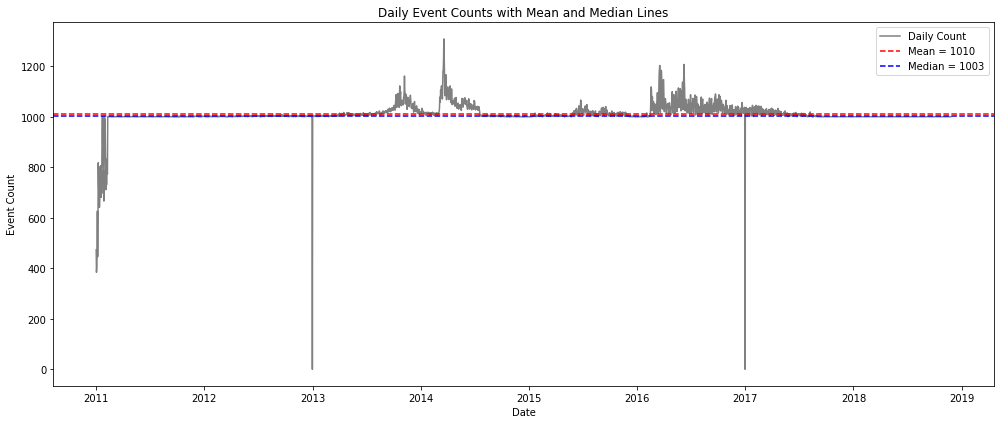

In [59]:
plot_series(df=df)

In [41]:
df_grouped_daily = df.groupby(['date_operation']).agg(
    count_total=('target', 'count'),
    count_n_real=('target', lambda x: (x==1).sum()),
).reset_index()

df_grouped_daily['DailyProportion'] = df_grouped_daily.apply(lambda x: x['count_n_real']/x['count_total'] ,axis=1)
df_grouped_daily['year'] = df_grouped_daily.apply(lambda x: x['date_operation'].year, axis=1)
df_grouped_year = df_grouped_daily.groupby(['year']).agg(mean_daily_prop=('DailyProportion','mean')).reset_index()

In [43]:
df_grouped_year['mean_daily_prop'] = df_grouped_year.apply(lambda x: x['mean_daily_prop']*100, axis=1)

In [ ]:
def plot_mean_daily_risk(df):

    highlight_years = {'2013', '2014', '2016'}
    shiny_red = '#FF3B3F'
    df['year'] = df['year'].astype(str)

    bar_colors = [shiny_red if year in highlight_years else 'grey' for year in df['year']]

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df, x='year', y='mean_daily_prop', palette=bar_colors)
    for bar, year in zip(ax.containers[0], df['year']):
        height = bar.get_height()
        label_color = shiny_red if year in highlight_years else 'dimgray'
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.1f}%",
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold',
            color=label_color
        )

    plt.title('Mean Daily Risk by Year', fontsize=20)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Mean Daily Proportion (%)', fontsize=12)
    plt.tight_layout()
    plt.show()

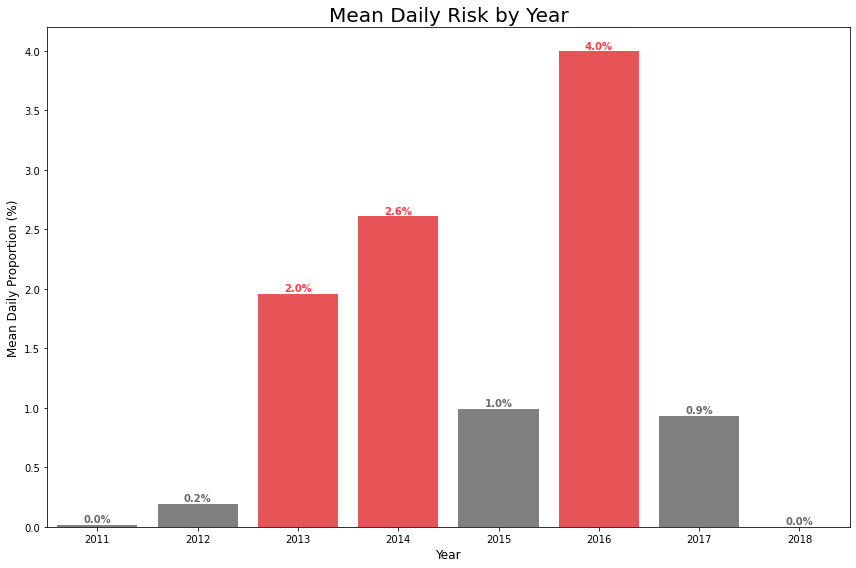

In [57]:
plot_mean_daily_risk(df_grouped_year)

<br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #2C4C65;'>Analysing target replication | Year</span>
</div>

<br>

In [11]:
def check_nas(df):
    if df.isna().sum()[lambda x: x > 0].empty:
        print("No NA's found in any column!")
    else:
        print("Found NA's in a certain columns")
        display(df.isna().sum()[lambda x: x > 0])

In [12]:
check_nas(df=df)

No NA's found in any column!


In [ ]:
def plot_proportion_target(df):
    df_plot = df.groupby(['year']).agg(
        count_n_target=('target', lambda x: (x == 0).sum()),
        count_y_target=('target', lambda x: (x == 1).sum()),
        count_total=('target', 'count')
    ).reset_index()
    df_plot['proportion'] = df_plot['count_y_target'] / df_plot['count_n_target']
    df_plot['year'] = df_plot['year'].astype(str)  # garantir ordenação categórica

    fig, ax1 = plt.subplots(figsize=(12, 8))

    sns.barplot(data=df_plot, x='year', y='count_total', color='grey', ax=ax1)
    ax1.set_ylabel('Total de Operações', fontsize=12)
    ax1.set_xlabel('Ano', fontsize=12)
    
    ax2 = ax1.twinx()
    ax2.plot(df_plot['year'], df_plot['proportion'], color='blue', marker='o', linewidth=2, label='Proporção (1/0)')
    ax2.set_ylabel('Proportion [Divided by 100]', fontsize=12, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    plt.title("Operations & Proportion based on Year", fontsize=20)
    plt.tight_layout()
    plt.show()

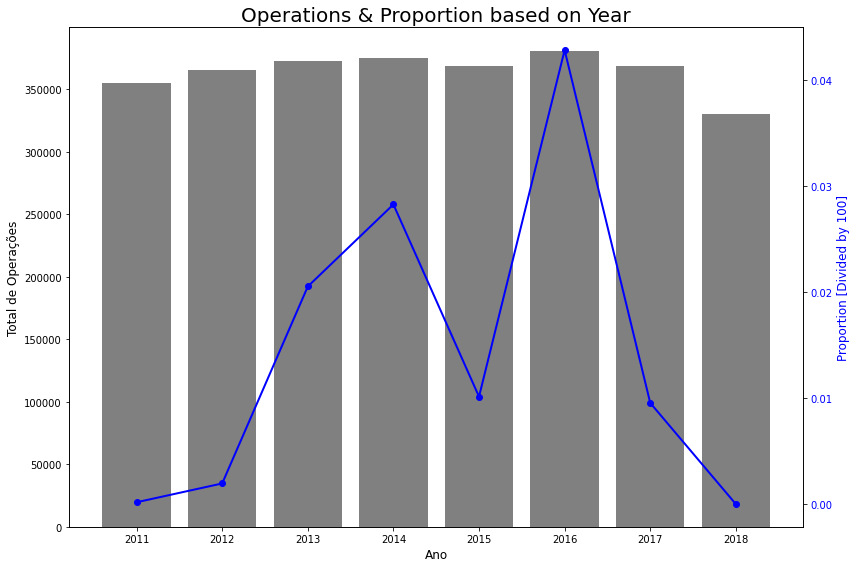

In [8]:
plot_proportion_target(df=df)

In [ ]:
def plot_per_year_couting(df):
    df_plot = df.groupby(['year']).agg(
        count_op_per_year=('year','count'),
    ).reset_index()

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_plot, x='year', y='count_op_per_year', color='grey')
    for i in ax.containers:
        ax.bar_label(i, fmt='%d', label_type='edge', padding=3)

    plt.title("Operations per Year", fontsize=20)
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

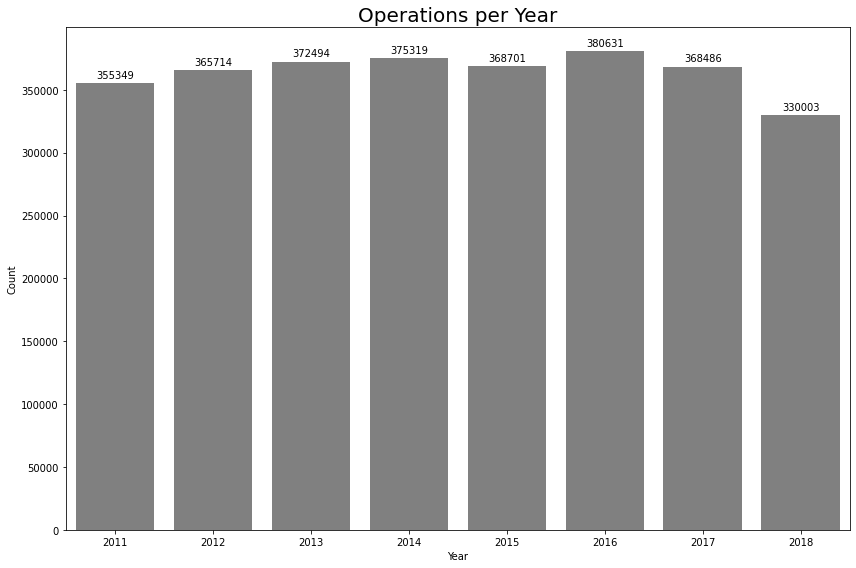

In [17]:
plot_per_year_couting(df=df)

In [6]:
df[
    (df['date_operation'] >= pd.Timestamp('2013-01-01')) &
    (df['date_operation'] <= pd.Timestamp('2017-12-31'))
].to_csv('../data/bronze_data.csv')

c:\Users\vinic\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
